# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Principal Components

In [2]:
repo = r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/principal_components/'

census_mm_pca_components = pd.read_csv(repo + 'census_mm_pca_components.csv')

census_mm_pca_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.074415,0.072795,-0.073199,-0.062028,0.026706,0.037905,0.048681,0.007789,0.006076,-0.006096
1,-0.064006,-0.056418,-0.105185,-0.004692,-0.071091,-0.032431,-0.019631,0.005956,0.038748,0.009590
2,0.133728,-0.055680,-0.034247,-0.034577,0.158417,-0.049024,-0.038093,-0.020549,0.008943,0.001166
3,-0.050600,-0.068836,0.011464,-0.012357,-0.074325,-0.140557,-0.056074,0.010950,0.024716,0.009990
4,0.013167,-0.117199,-0.069830,0.023085,0.002655,-0.033732,-0.014569,0.033979,-0.001900,0.001083
...,...,...,...,...,...,...,...,...,...,...
3216,0.070424,-0.005995,-0.039615,-0.055676,0.031370,0.052732,-0.053833,0.048348,0.018719,-0.006217
3217,-0.263566,0.076393,0.002725,-0.008141,0.011324,-0.115794,0.046044,0.016815,-0.050031,0.006351
3218,0.038189,0.008645,-0.014161,0.004233,-0.004891,0.018897,0.075353,-0.043897,-0.004598,-0.006625
3219,0.157235,-0.075680,0.009383,0.017310,-0.066877,-0.015453,-0.011125,-0.003909,0.014601,-0.010933


# Nearest Neighbors

In [36]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(components)
distances, indices = nbrs.kneighbors(components)
print(f'Distances:\n{distances}\n\nIndices:\n{indices}')

Distances:
[[0.         0.15112035]
 [0.         0.05412471]
 [0.         0.17150628]
 ...
 [0.         0.22317987]
 [0.         0.17464636]
 [0.         0.20337661]]

Indices:
[[   0 2176]
 [   1 3002]
 [   2 1263]
 ...
 [3218 2039]
 [3219   70]
 [3220  967]]


# Plotting K-Distance
Finds value of epsilon

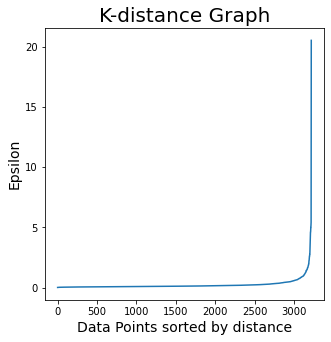

In [37]:
%matplotlib inline

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(5,5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

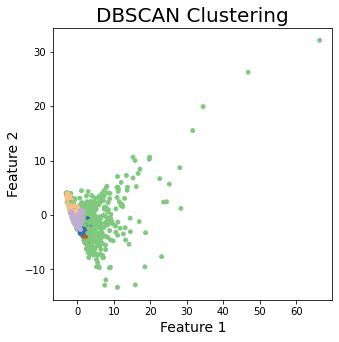

In [29]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(components)

components['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
plt.figure(figsize=(5,5))
plt.scatter(components['PC1'],components['PC2'],c=components['DBSCAN_labels'],cmap='Accent',s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

# K-Means

In [3]:
from sklearn.cluster import KMeans

def kmeans_elbow(X):
    wcss=[]
    for k in range(1,11):
        kmeans = KMeans(n_clusters=k, init='k-means++')
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(5,5))
    plt.grid()
    plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
    plt.xlabel('K Value')
    plt.ylabel('WCSS')
    return plt.show()

In [4]:
def kmeans_cluster(df, X):
    tmp      = df
    kmeans   = KMeans(n_clusters = 5)
    clusters = kmeans.fit_predict(X)
    tmp['label'] = clusters
    return tmp

In [5]:
#%pylab
#%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

def plot_k(df): 
   
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df['PC1'][df.label == 0], df['PC2'][df.label == 0],df['PC3'][df.label == 0],c='blue', s=20)
    ax.scatter(df['PC1'][df.label == 1], df['PC2'][df.label == 1],df['PC3'][df.label == 1],c='red', s=20)
    ax.scatter(df['PC1'][df.label == 2], df['PC2'][df.label == 2],df['PC3'][df.label == 2],c='green', s=20)
    ax.scatter(df['PC1'][df.label == 3], df['PC2'][df.label == 3],df['PC3'][df.label == 3],c='orange', s=20)
    ax.scatter(df['PC1'][df.label == 4], df['PC2'][df.label == 4],df['PC3'][df.label == 4],c='purple', s=20)
    ax.view_init(30,120)

    ### CHECK/ VALIDATE THESE!!!!
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    ax.set_zlabel('PC3')

    plt.show()

# K-Means

### census_mm_pca_components

In [7]:
repo_pca = r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/principal_components/'

census_mm_pca_components  = pd.read_csv(repo_pca + 'census_mm_pca_components.csv')

# grabs only first 3 components
X = census_mm_pca_components.iloc[:, :3].values 

# elbow curve
kmeans_elbow(X)


%pylab
# k-mean algo
census_mm_pca_components = kmeans_cluster(census_mm_pca_components, X)
display(census_mm_pca_components)



# plot k-means
plot_k(census_mm_pca_components)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,label
0,0.074415,0.072795,-0.073199,-0.062028,0.026706,0.037905,0.048681,0.007789,0.006076,-0.006096,0
1,-0.064006,-0.056418,-0.105185,-0.004692,-0.071091,-0.032431,-0.019631,0.005956,0.038748,0.009590,4
2,0.133728,-0.055680,-0.034247,-0.034577,0.158417,-0.049024,-0.038093,-0.020549,0.008943,0.001166,0
3,-0.050600,-0.068836,0.011464,-0.012357,-0.074325,-0.140557,-0.056074,0.010950,0.024716,0.009990,4
4,0.013167,-0.117199,-0.069830,0.023085,0.002655,-0.033732,-0.014569,0.033979,-0.001900,0.001083,4
...,...,...,...,...,...,...,...,...,...,...,...
3216,0.070424,-0.005995,-0.039615,-0.055676,0.031370,0.052732,-0.053833,0.048348,0.018719,-0.006217,0
3217,-0.263566,0.076393,0.002725,-0.008141,0.011324,-0.115794,0.046044,0.016815,-0.050031,0.006351,1
3218,0.038189,0.008645,-0.014161,0.004233,-0.004891,0.018897,0.075353,-0.043897,-0.004598,-0.006625,0
3219,0.157235,-0.075680,0.009383,0.017310,-0.066877,-0.015453,-0.011125,-0.003909,0.014601,-0.010933,0


Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### census_ss_pca_components

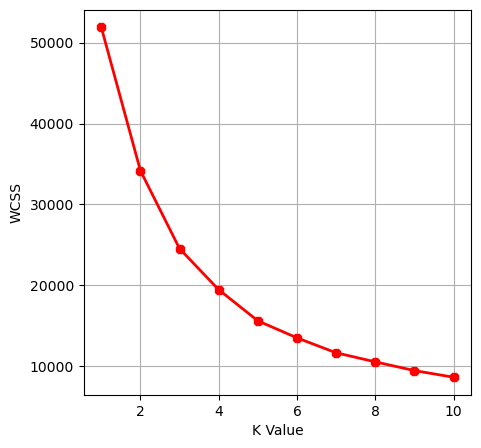

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,label
0,0.243359,-0.621418,-0.538516,1.246014,-0.277606,0.219000,-0.193943,0.051073,-0.295182,-0.439523,1
1,-1.165074,-0.117813,1.159597,0.196994,-0.315853,0.554158,0.778354,0.273452,0.322237,-0.024934,1
2,0.241616,-1.883425,-0.021386,1.235618,0.495976,-0.976336,-0.661817,0.135262,0.126840,0.903099,1
3,-0.943044,-0.399704,0.326186,-1.100907,-0.135787,0.409427,1.009432,0.881445,0.686204,0.916943,1
4,-0.699336,-0.838264,1.388388,0.064971,-0.072504,-0.166456,0.315149,0.300240,0.236530,0.328140,1
...,...,...,...,...,...,...,...,...,...,...,...
3216,-0.171748,-1.193146,0.127045,0.681341,-0.044054,0.044371,0.087857,-0.914536,0.438892,0.132418,1
3217,-1.900711,1.731057,-0.857641,0.031207,-0.192980,-0.029414,0.326221,1.463281,0.068664,0.588262,4
3218,0.207718,0.006282,-0.152389,0.238760,-0.055145,0.034441,-0.465426,0.461660,-0.615429,-0.673472,1
3219,1.085174,-1.119618,0.649589,-0.894296,-0.310743,0.292584,0.145819,0.114085,0.145128,-0.095477,1


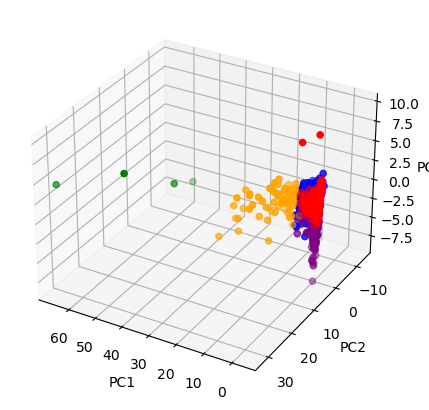

In [32]:
repo_pca = r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/principal_components/'

census_ss_pca_components  = pd.read_csv(repo_pca + 'census_ss_pca_components.csv')

# grabs only first 3 components
X = census_ss_pca_components.iloc[:, :3].values 

# elbow curve
kmeans_elbow(X)

# k-mean algo
census_ss_pca_components = kmeans_cluster(census_ss_pca_components, X)
display(census_ss_pca_components)

# plot k-means
plot_k(census_ss_pca_components)

# redfin_mm_pca_components

In [9]:
%pylab

repo_pca = r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/principal_components/'

redfin_mm_pca_components  = pd.read_csv(repo_pca + 'redfin_mm_pca_components.csv')

# grabs only first 3 components
X = redfin_mm_pca_components.iloc[:, :3].values 

# elbow curve
kmeans_elbow(X)

# k-mean algo
redfin_mm_pca_components = kmeans_cluster(redfin_mm_pca_components, X)
display(redfin_mm_pca_components)

# plot k-means
plot_k(redfin_mm_pca_components)

Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,label
0,0.317161,-0.705557,0.078961,-0.458155,-0.005652,-0.183930,0.072187,0.011991,0.047950,-0.015377,0
1,-0.402436,0.720347,0.305065,-0.555383,0.288389,0.206303,-0.147651,-0.091832,-0.093610,-0.189539,2
2,0.822845,0.178027,0.165394,0.107567,0.097006,-0.170268,0.036374,-0.686669,0.370964,-0.044032,1
3,0.089343,-0.403640,0.376551,-0.166206,0.281799,-0.353378,0.228585,0.127541,0.112350,-0.014517,0
4,-0.137056,-0.293213,0.131889,-0.202973,-0.116096,-0.725526,-0.496865,-0.128934,-0.450441,0.826003,0
...,...,...,...,...,...,...,...,...,...,...,...
48844,-0.226598,-0.463080,-0.466169,-0.193632,0.360977,0.116376,-0.087674,-0.179201,-0.183078,0.004987,4
48845,-0.145188,-0.320460,0.422156,-0.477309,-0.267527,0.379760,-0.325754,-0.016724,0.053705,-0.032353,0
48846,-0.352000,-0.518394,-0.418067,-0.407144,-0.343553,0.535729,0.135822,0.038258,0.090829,0.056035,4
48847,-0.050212,-0.311397,0.932897,-0.454196,-0.329548,0.523813,0.114245,0.068765,0.115527,-0.110593,0


### redfin_ss_pca_components

In [8]:
repo_pca = r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/principal_components/'

redfin_ss_pca_components  = pd.read_csv(repo_pca + 'redfin_ss_pca_components.csv')

# grabs only first 3 components
X = redfin_ss_pca_components.iloc[:, :3].values 
%pylab
# elbow curve
kmeans_elbow(X)

# k-mean algo
redfin_ss_pca_components = kmeans_cluster(redfin_ss_pca_components, X)
display(redfin_ss_pca_components)

# plot k-means
plot_k(redfin_ss_pca_components)

Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,label
0,0.524233,-2.559521,0.459837,-0.508818,0.592072,-1.313750,0.040855,0.115808,0.306844,1.413510,0
1,-1.800326,1.902161,-1.878670,-1.159380,-0.056371,0.757488,-1.114266,0.266332,0.200666,1.431240,2
2,-0.848712,-0.798932,-0.700922,-0.137733,0.018784,-0.147573,-1.250733,-0.953146,0.275758,0.033908,0
3,-0.228148,-1.322640,0.745922,0.243030,-0.464482,0.002496,-1.335928,0.373192,0.007066,0.270195,0
4,0.209352,0.856788,5.661612,1.655823,-4.100012,2.775485,0.312861,-0.535592,-0.431051,1.567258,3
...,...,...,...,...,...,...,...,...,...,...,...
48844,0.069587,-1.286599,-0.627121,2.895637,-0.552821,0.790298,1.598922,0.232716,0.032409,1.663148,0
48845,0.080806,-1.061991,-0.163504,-0.263491,-0.206887,0.311081,-1.269822,-0.539958,0.069568,-0.075491,0
48846,1.576881,-0.845751,-1.081923,0.446629,-1.490457,-0.317520,0.323457,-0.242233,-0.124137,-0.775330,0
48847,-0.552962,-1.946329,-1.236244,-0.261230,1.557373,0.517040,-2.599553,-1.253377,0.420483,-0.674546,0


# Merge Results onto original datasets

In [37]:
repo_d = r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/'

Census Merge

In [49]:
census_data = pd.read_csv(repo_d + 'census.csv')

census_clusters = census_data[['GEOID']]                                               \
    .join(census_ss_pca_components[['label']].rename(columns={'label':'census_ss_k'})) \
    .join(census_mm_pca_components[['label']].rename(columns={'label':'census_mm_k'}))

census_clusters

#census_clusters.to_csv(r'C:\Users\Mattl\Desktop\Data\census_clusters.csv',index=False)

,GEOID,census_ss_k,census_mm_k
0,20161,1,3
1,19159,1,1
2,30009,1,3
3,16007,1,1
4,55011,1,1
...,...,...,...
3216,53003,1,3
3217,13043,4,2
3218,48451,1,3
3219,39089,1,3


Redfin Merge

In [48]:
# redfin_data = pd.read_csv(repo_d + 'redfin.csv')

# redfin_data[['GEOID']]                                                                 \
#     .join(redfin_ss_pca_components[['label']].rename(columns={'label':'redfin_ss_k'})) \
#     .join(redfin_mm_pca_components[['label']].rename(columns={'label':'redfin_mm_k'}))